In [1]:
import bnlearn as bn
import matplotlib.pyplot as plt # gráficos y visualizaciones
import seaborn as sns # plt + estadisticas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sys import path # modificar la lista de rutas de búsqueda que el intérprete de Python utiliza para buscar módulos y paquetes.
import os # interactua con el sistema operativo
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import funtions


../resources/dataset_a_2021v2.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv


In [2]:
#df = pd.read_csv('../resources/dataset_unab_ORIGINAL SIN P1.csv')
#df = pd.read_csv('../resources/dataset_unab_P1.csv')
df = pd.read_excel(open('../resources/dataset_a_2021v2.xlsx','rb'))
df.head()

,nrc,exitosos,fallidos,envios,e0,e1,e2,e3,e4,e5,...,e46,e47,e48,e49,e50,e51,e52,programa,sol1,id
0,1633,10,21,31,1,0,0,1,1,0,...,0,0,0,0,0,0,0,UNAB22115,1.0,1
1,1632,7,9,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,UNAB22115,1.0,2
2,1632,6,10,16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,UNAB22115,1.0,3
3,1633,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,UNAB22115,1.0,4
4,10471,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,UNAB22510,1.0,5


In [3]:
df['aprobado']=df.apply(lambda x: funtions.set_in_aprobado_nota(x['sol1']),axis = 1 )
print(df.columns)

Index(['nrc', 'exitosos', 'fallidos', 'envios', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'programa', 'sol1',
       'id', 'aprobado'],
      dtype='object')


In [4]:
DAG = bn.structure_learning.fit(df)
print(DAG['adjmat'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
target      nrc  exitosos  fallidos  envios     e0     e1     e2     e3  \
source                                                                    
nrc       False     False     False   False  False  False  False  False   
exitosos  False     False     False   False  False  False  False   True   
fallidos  False     False     False   False  False  False  False  False   
envios    False     False     False   False  False  False  False  False   
e0        False      True      True   False  False  False  False  False   
...         ...       ...       ...     ...    ...    ...    ...    ...   
e52       False     False     False   False  False  False  False  False   
programa  False     False     False   False  False  False  False  False   
sol1      False     False     False   False  False  False  False  

Text(0.5, 1.0, 'Aprobados/Reprobados Solemne 1 del dataset')

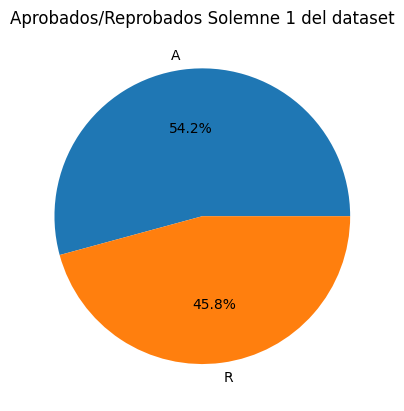

In [5]:
plt.pie(df['aprobado'].value_counts(),labels=['A','R'],autopct='%1.1f%%')
plt.title('Aprobados/Reprobados Solemne 1 del dataset')

In [46]:
print("Buscando el valor unico y su cardinalidad \n");
df['programa'].value_counts()

Buscando el valor unico y su cardinalidad 



UNAB12100    213
UNAB11500    185
UNAB12210    180
UNAB22115     94
UNAB21500     42
UNAB22100     41
UNAB22510     32
UNAB12510     30
UNAB21503     16
UNAB18000      2
UNAB22505      1
UNAB16507      1
UNAB35636      1
UNAB10100      1
Name: programa, dtype: int64

In [48]:
print("Porcentaje de aprobacion solemne 1 ")

print("UNAB12100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12100'].shape[0])*100))

print("UNAB11500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB11500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB11500'].shape[0])*100))

print("UNAB12210: {0:.2f}%"
    .format((df[(df['programa']=='UNAB12210') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB12210'].shape[0])*100))

print("UNAB22115: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22115') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22115'].shape[0])*100))

print("UNAB21500: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21500') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21500'].shape[0])*100))

print("UNAB22100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22100'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB21503: {0:.2f}%"
    .format((df[(df['programa']=='UNAB21503') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB21503'].shape[0])*100))

print("UNAB18000: {0:.2f}%"
    .format((df[(df['programa']=='UNAB18000') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB18000'].shape[0])*100))

print("UNAB22505: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22505') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22505'].shape[0])*100))

print("UNAB22510: {0:.2f}%"
    .format((df[(df['programa']=='UNAB22510') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB22510'].shape[0])*100))

print("UNAB16507: {0:.2f}%"
    .format((df[(df['programa']=='UNAB16507') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB16507'].shape[0])*100))

print("UNAB35636: {0:.2f}%"
    .format((df[(df['programa']=='UNAB35636') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB35636'].shape[0])*100))

print("UNAB10100: {0:.2f}%"
    .format((df[(df['programa']=='UNAB10100') & 
    (df['aprobado']==1)].shape[0]/df[df['programa']=='UNAB10100'].shape[0])*100))

Porcentaje de aprobacion solemne 1 
UNAB12100: 28.64%
UNAB11500: 43.78%
UNAB12210: 65.56%
UNAB22115: 43.62%
UNAB21500: 38.10%
UNAB22100: 58.54%
UNAB22510: 34.38%
UNAB21503: 75.00%
UNAB18000: 0.00%
UNAB22505: 0.00%
UNAB22510: 34.38%
UNAB16507: 0.00%
UNAB35636: 100.00%
UNAB10100: 100.00%


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


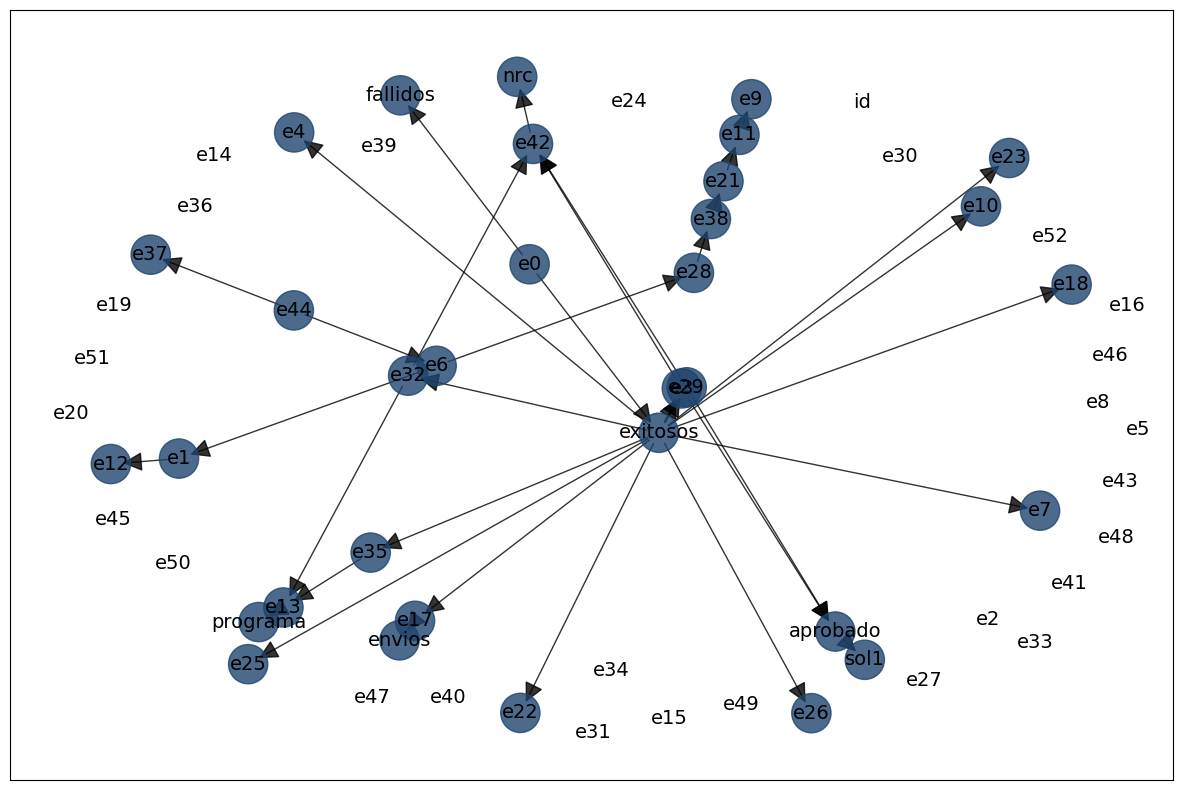

In [51]:
G = bn.plot(DAG)
# G = bn.plot(model, interactive=True)

In [53]:
# Parameter learning on the user-defined DAG and input data using Bayes
model_bayes = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# Print the learned CPDs
bn.print_CPD(model_bayes)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of exitosos:
+--------------+----------------------+----------------------+
| e0           | e0(0)                | e0(1)                |
+--------------+----------------------+----------------------+
| exitosos(0)  | 0.212816691505216    | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(1)  | 0.03467461500248384  | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(2)  | 0.04123199205166417  | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(3)  | 0.056532538499751595 | 0.02459661550570641  |
+--------------+----------------------+----------------------+
| exitosos(4)  | 0.055439642324888204 | 0.02459661550570641  |
+--------------+------

In [ ]:
# model_mle = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')
# bn.print_CPD(model_mle)

In [ ]:
model = bn.structure_learning.fit(df)
# Compute edge strength with the chi_square test statistic
model = bn.independence_test(model, df)
G = bn.plot(model)

In [ ]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_bic = bn.independence_test(model_hc_bic, df)
G = bn.plot(model_hc_bic)

In [ ]:
# model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
# model_hc_k2 = bn.independence_test(model_hc_k2, df)
# G = bn.plot(model_hc_k2)

In [ ]:
# model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
# model_hc_bdeu = bn.independence_test(model_hc_bdeu, df)
# G = bn.plot(model_hc_bdeu)

In [ ]:
# model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
# model_ex_bic = bn.independence_test(model_ex_bic, df)
# G = bn.plot(model_ex_bic)

In [ ]:
# model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
# model_ex_k2 = bn.independence_test(model_ex_k2, df)
# G = bn.plot(model_ex_k2)

In [ ]:
# model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
# model_ex_bdeu = bn.independence_test(model_ex_bdeu, df)
# G = bn.plot(model_ex_bdeu)

In [ ]:
# model_cl = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')
# model_cl = bn.independence_test(model_cl, df)
# G = bn.plot(model_cl)

In [ ]:
# model_tan     = bn.structure_learning.fit(df, methodtype='tan', root_node='Wet_Grass', class_node='Rain')
# model_tan = bn.independence_test(model_tan, df)
# G = bn.plot(model_tan)